
# **Predicting** **fraudulent** **transactions** **for** **a** **financial** **company** 
Business Context
This case requires trainees to develop a model for predicting fraudulent transactions for a 
financial company and use insights from the model to develop an actionable plan. Data for the 
case is available in CSV format having 6362620 rows and 10 columns.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/admin/Desktop/Fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
len(df['nameOrig'].unique())

6353307

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [16]:
df=df.drop(['step'], axis = 1)
df=df.drop(['nameOrig'], axis = 1)
df=df.drop(['nameDest'], axis = 1)

In [17]:
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [18]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [19]:
import pandas as pd
df['type']=pd.get_dummies(df['type'],drop_first=True)

In [20]:
# to have a more manageable data to work with
data = df.sample(frac = 0.1, random_state = 1)
print(df.shape)

(6362620, 8)


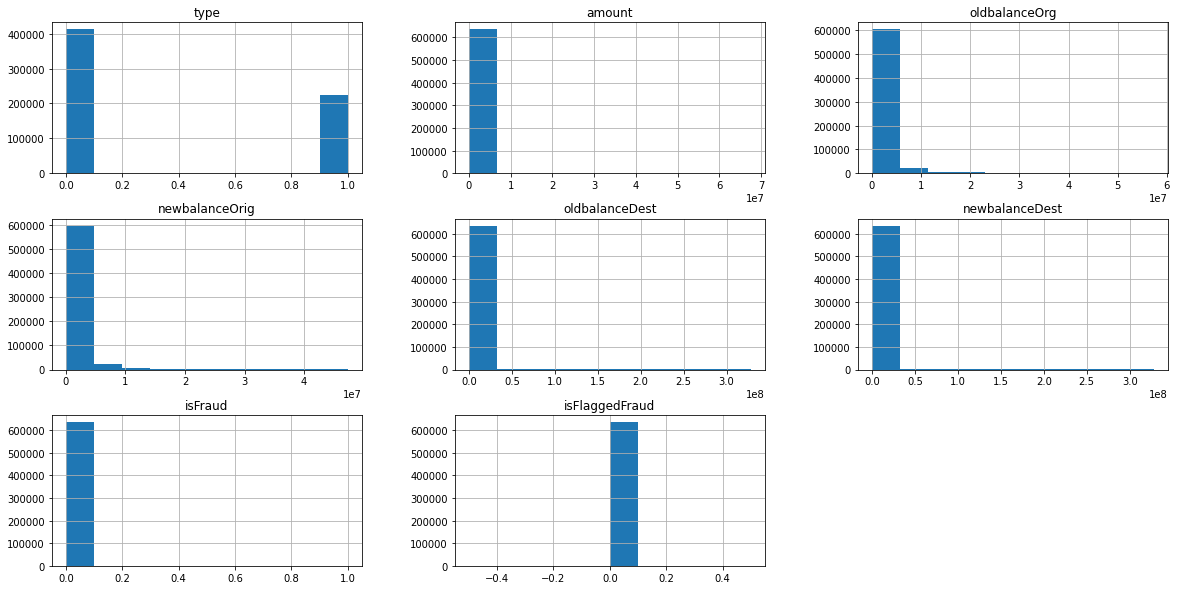

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# print histogram for each parameter
data.hist(figsize=(20,10))
plt.show()

In [22]:

# number of fraud and valid cases
fraud = data[data['isFraud'] == 1]
valid = data[data['isFraud'] == 0]

outlier_frac = len(fraud) / float(len(valid))
print(outlier_frac)

print("fraud cases: {}".format(len(fraud)))
print("valid cases: {}".format(len(valid)))

0.0012888646188564514
fraud cases: 819
valid cases: 635443


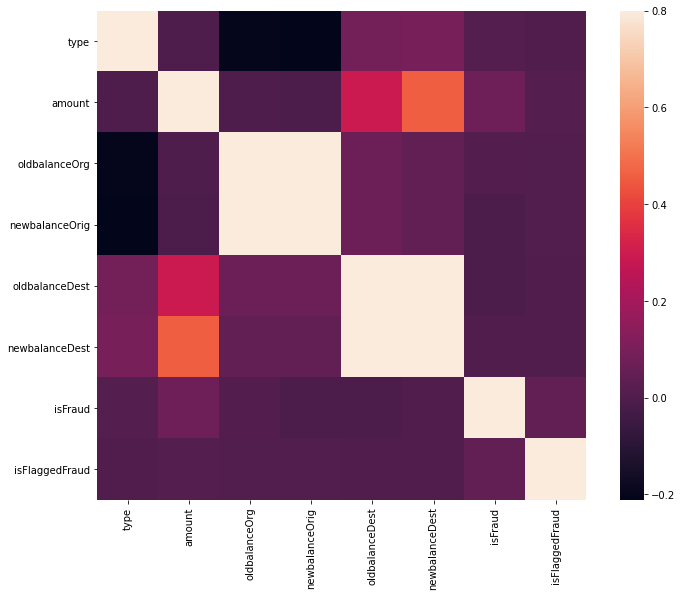

In [23]:
# correlation matrix
cormat = df.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(cormat, vmax = 0.8, square=True)
plt.show()

In [24]:

# get all columns from the dataframe
col = data.columns.tolist()

# filter the columns to remove the data we do not want
col = [c for c in col if c not in ['isFraud']]

# store the variable we'll be predicting 
target = 'isFraud'

X = data[col]
Y = data[target]

print(X.shape)
print(Y.shape)

(636262, 7)
(636262,)


In [25]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
6322570,0,23557.12,8059.00,31616.12,169508.66,145951.53,0
3621196,0,6236.13,0.00,0.00,0.00,0.00,0
1226256,0,33981.87,18745.72,0.00,0.00,0.00,0
2803274,1,263006.42,20072.00,0.00,390253.56,653259.98,0
3201247,1,152013.74,20765.00,0.00,252719.19,404732.93,0


In [26]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


In [27]:
# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,Y_Train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
classifier.score(X_Test,Y_Test)

0.9994970641117523

In [29]:
# Predicting the test set results

Y_Pred = classifier.predict(X_Test)

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_Test, Y_Pred))
print('MSE:', metrics.mean_squared_error(Y_Test, Y_Pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred)))

MAE: 0.0005029358882476456
MSE: 0.0005029358882476456
RMSE: 0.022426232145584455
